Created by: Cole Ruoff, Kyle Hansen, and Hanna Choe



#INTRODUCTION
Coronavirus disease 2019, also known as COVID-19, is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). This disease was first idetified in Wuhan, China in December 2019. COVID-19 led to a pandemic after it spread across the world.

For Further information visit these links:

https://www.cdc.gov/coronavirus/2019-ncov/downloads/2019-ncov-factsheet.pdf

https://www.who.int/health-topics/coronavirus#tab=tab_1


The pandemic affected every country in the world resulting in the loss of many lives. Some countries were hit harder than others depending on various aspects. 

During the summer of 2020 when it seemed like the pandemic was at its peak, people across America were critcizing the government on the news and on social media. These people were saying that the government was doing a poor job at containing the virus and that they were responsible for the loss of thousands of lives. In this analysis we will be determining whether or not this criticism was warranted. This will be done by comparing the United States cases and deaths from COVID-19 to the other 9 of the top 10 most populated countries in the world.

We will also be looking deeper into what factors might have contributed to higher fatality rates in the top 10 most populated countries.

#TECHNICAL RESOURCES
There are linkes to guides that will give you more information on the languages, libaries, and resources we used during this project.

https://www.python.org/

https://pandas.pydata.org/

https://numpy.org/

https://matplotlib.org/

https://scikit-learn.org/stable/

#DATA COLLECTION
To begin our investigation, we started by gathering data about the top 10 most populated countries in the world. The data we extracted was found in a dataset from a website called [kaggle](https://www.kaggle.com/ ), a large online data science community. 

You can also download the data that we used in this project yourself [here](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=COVID19_open_line_list.csv).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#DATA COLLECTION

#Shows information about people that contracted COVID in China (age/sex/location/etc)
china_data = pd.read_csv("/content/drive/MyDrive/320 Final Project files/COVID19_open_line_list[1].csv")

#Shows number of cases from locations around the world from 1/22/20 - 11/15/20
world_cases_time_data = pd.read_csv("/content/drive/MyDrive/320 Final Project files/time_series_covid_19_confirmed[1].csv")

#Shows number of cases from locations around the USA from 1/22/20 - 11/15/20
US_cases_time_data = pd.read_csv("/content/drive/MyDrive/320 Final Project files/time_series_covid_19_confirmed_US[1].csv")

#Shows number of deaths from locations around the world from 1/22/20 - 11/15/20
world_death_time_data = pd.read_csv("/content/drive/MyDrive/320 Final Project files/time_series_covid_19_deaths[1].csv")

#Shows number of deaths from locations around the USA from 1/22/20 - 11/15/20
US_death_time_data = pd.read_csv("/content/drive/MyDrive/320 Final Project files/time_series_covid_19_deaths_US[1].csv")

#Shows number of recovered cases from locations around the world from 1/22/20 - 11/15/20
world_recover_data = pd.read_csv("/content/drive/MyDrive/320 Final Project files/time_series_covid_19_recovered[1].csv")

#Get relevant data to test for covid trends and see what matters
country_data1 = pd.read_csv("/content/drive/MyDrive/320 Final Project files/covid19countryinfo.csv",thousands=',')

Data collection is the first step in data life cycle. To gather this data we visted kaggle and downloaded free csv files filled with country data on the coronavirus. We also downloaded datasets on miscellanous data about each country to graph these factors and see if one, or multiple, showed a trend in affecting the fataility rate of the coronavirus. To get these data sets visit [this](https://www.kaggle.com/koryto/countryinfo) link.



# DATA PROCESSING

In [5]:
#DATA PROCESSING

#Removing non-states, except DC
US_cases_time_data.drop(US_cases_time_data[US_cases_time_data['Province_State'] == 'Diamond Princess'].index, inplace=True)
US_cases_time_data.drop(US_cases_time_data[US_cases_time_data['Province_State'] == 'Grand Princess'].index, inplace=True)
US_cases_time_data.drop(US_cases_time_data[US_cases_time_data['Province_State'] == 'Guam'].index, inplace=True)
US_cases_time_data.drop(US_cases_time_data[US_cases_time_data['Province_State'] == 'Northern Mariana Islands'].index, inplace=True)
US_cases_time_data.drop(US_cases_time_data[US_cases_time_data['Province_State'] == 'Virgin Islands'].index, inplace=True)
US_cases_time_data.drop(US_cases_time_data[US_cases_time_data['Province_State'] == 'American Samoa'].index, inplace=True)

#Keep only columns that will be used in country data
country_data = country_data1[['country','density','medianage','urbanpop','hospibed','sexratio','gdp2019']]
#Replace any Nan values with 0
country_data.replace(np.nan,0)
#Keep only top 10 countries we are working with in this project
country_data2 = country_data.loc[[34, 86, 182, 87, 140, 22, 136, 13, 152, 121]]

Once we had downloaded our data from the CSV files and stored them into pandas data frames some of the data required fixing. This is the next step of the data science lifecycle and is called, data processing. In this step we dropped the miscellaneous states in the USA state data table. We also elminated trends from the country data dataset that we thought would not be useful, or did not have enough data entries. Some columns of this data set had the value "NaN", so we replaced this data with 0, and then selected the 10 countries that we will be using throuhgout this project.

# DATA VISUALIZATION

The next step in our process was presenting our data in a way that was more meaningful to the naked eye. We used the pandas and matplotlib libraries to create line graphs of the number of Covid-19 cases in each of the top 10 most populated countries in the world from January 22 of 2020 to November 15 of 2020. We also created a line graph of the amount of Covid-19 cases for each state in the U.S. to provide a better visualization of how the virus spread within the nation. The goal of this part of our project is to get a better grasp of what the data looks like. By doing so, it will aid us in analyzing the data, like finding trends or perhaps outliers.

We chose to use only the top 10 most populated countries in the world in order to narrow our spectrum of data. This will ultimately make it easier and more efficient to analyze the data. [This](https://www.worldometers.info/world-population/population-by-country/) is the source we used to determine what they are.



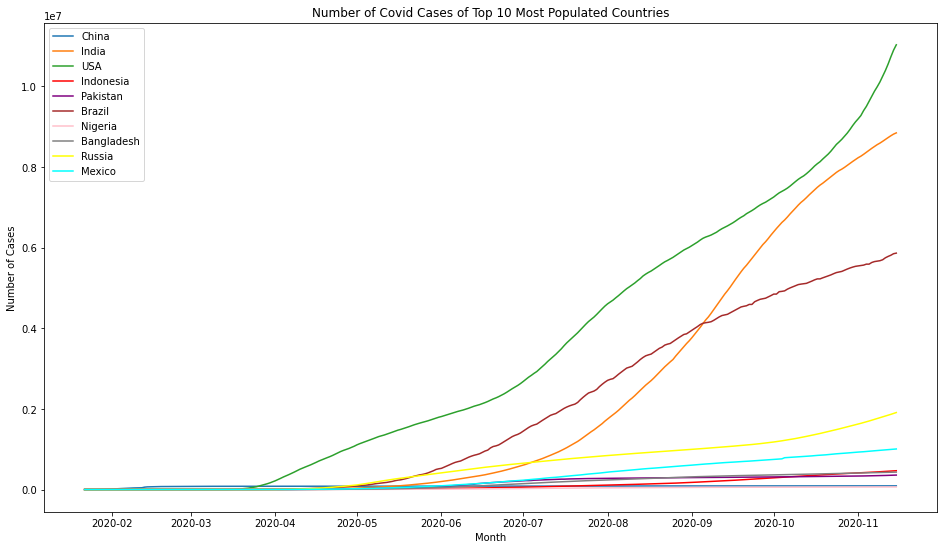

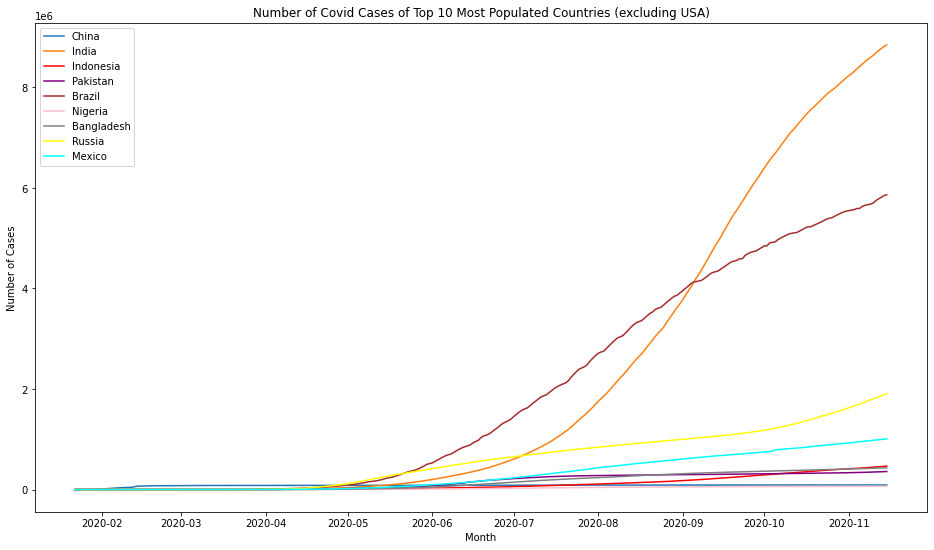

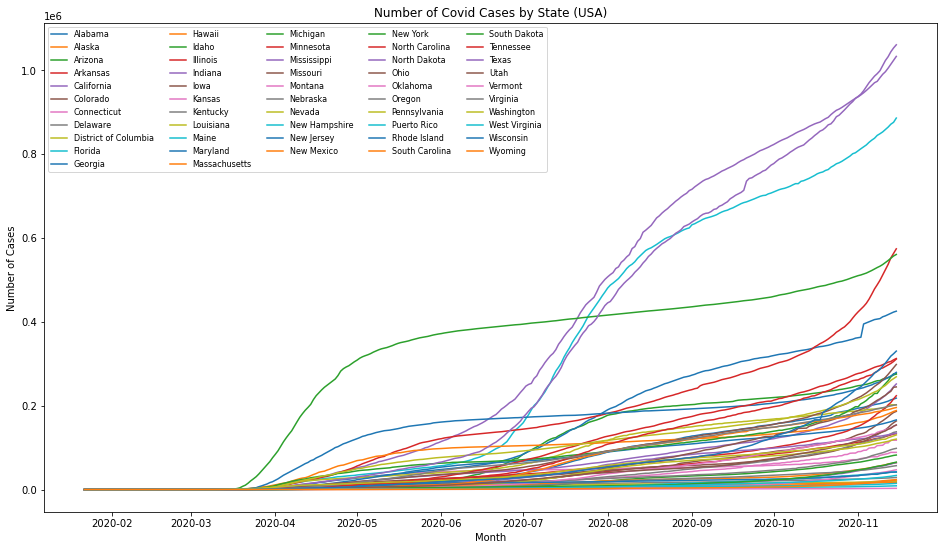

In [15]:
#DATA VISUALIZATION

#Converting dates to datetime.date objects
dates = world_cases_time_data.columns[4:]
dates2 = [datetime.strptime(d, '%m/%d/%y').date() for d in dates]

#Grouping all China data into one series
china_cases = world_cases_time_data.iloc[56:89,:]
china_cases = china_cases.groupby(china_cases['Country/Region']).sum()
china_cases = china_cases.reset_index()
china_cases = china_cases.iloc[:,3:]

#Grouping for India
india_cases = world_cases_time_data.iloc[143, 4:]

#Grouping for USA
us_cases = US_cases_time_data.groupby(US_cases_time_data['Country_Region']).sum()
us_cases = us_cases.reset_index()
us_cases = us_cases.iloc[:,6:]

#Grouping for Indonesia
indonesia_cases = world_cases_time_data.iloc[144, 4:]

#Grouping for Pakistan
pakistan_cases = world_cases_time_data.iloc[199, 4:]

#Grouping for Brazil
brazil_cases = world_cases_time_data.iloc[30, 4:]

#Grouping for Nigeria
nigeria_cases = world_cases_time_data.iloc[195,4:]

#Grouping for Bangladesh
bangladesh_cases = world_cases_time_data.iloc[20,4:]

#Grouping for Russia
russia_cases = world_cases_time_data.iloc[209, 4:]

#Grouping for Mexico
mexico_cases = world_cases_time_data.iloc[178, 4:]

#Plotting number of covid cases from top 10 most populated countries
plt.title("Number of Covid Cases of Top 10 Most Populated Countries")
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.plot(dates2, china_cases.iloc[0], label='China')
plt.plot(dates2, india_cases, label='India')
plt.plot(dates2, us_cases.iloc[0], label='USA')
plt.plot(dates2, indonesia_cases, label='Indonesia', color="r")
plt.plot(dates2, pakistan_cases, label='Pakistan', color ="purple")
plt.plot(dates2, brazil_cases, label='Brazil', color = 'brown')
plt.plot(dates2, nigeria_cases, label='Nigeria', color = 'pink')
plt.plot(dates2, bangladesh_cases, label='Bangladesh', color = 'gray')
plt.plot(dates2, russia_cases, label='Russia', color = 'yellow')
plt.plot(dates2, mexico_cases, label='Mexico', color = 'cyan')
plt.legend()
plt.show()

#Plotting number of covid cases from top 10 most populated countries
#This plot excludes USA to give a better visual
plt.title("Number of Covid Cases of Top 10 Most Populated Countries (excluding USA)")
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(dates2, china_cases.iloc[0], label='China')
plt.plot(dates2, india_cases, label='India')
plt.plot(dates2, indonesia_cases, label='Indonesia', color="r")
plt.plot(dates2, pakistan_cases, label='Pakistan', color ="purple")
plt.plot(dates2, brazil_cases, label='Brazil', color = 'brown')
plt.plot(dates2, nigeria_cases, label='Nigeria', color = 'pink')
plt.plot(dates2, bangladesh_cases, label='Bangladesh', color = 'gray')
plt.plot(dates2, russia_cases, label='Russia', color = 'yellow')
plt.plot(dates2, mexico_cases, label='Mexico', color = 'cyan')

plt.legend()
plt.show()

#Cases by states of the US
#Excludes non-states, except DC
us_cases = US_cases_time_data.groupby(US_cases_time_data['Province_State']).sum()
us_cases = us_cases.iloc[:,5:]
for index, row in us_cases.iterrows():
  plt.plot(dates2, row, label=index)
plt.title("Number of Covid Cases by State (USA)")
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend(ncol=5, loc='upper left', fontsize=8)
plt.show()


As you can see from the first graph, the virus really began to spread around May of 2020. The amount of cases in the United States took off earlier in April of this year - one month earlier than the other 9 most populated countries. Just by looking at the first graph, entitled "Number of Covid Cases of Top 10 Most Populated Countries", it seems as though the US government has in fact done a poor job of containing the virus. The US has maintained a strong lead in cases over countries like India and Pakistan. Additionally, it appears as though its number of cases has steadily been increasing, while other countries are on the verge of plateauing. In fact, many of the other countries, such as Mexico, Indonesia or Nigeria have been able to suppress the number of infections to fairly well. However, the number of cases in the US has certainly been on the rise and looks as though it is not slowing down.

In the next section, we plot each countries fatality rate. These percentages will better show us the relationship, if any, between the number of contractions of the disease and the mortality rates. It will also show us how the fatality percentages of each country compare to each other. We did so by manipulating the pandas dataframe which stores our data and employing matplotlib to scatter our data on a graph.


/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:2832: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  order=order, subok=True, ndmin=ndmin)


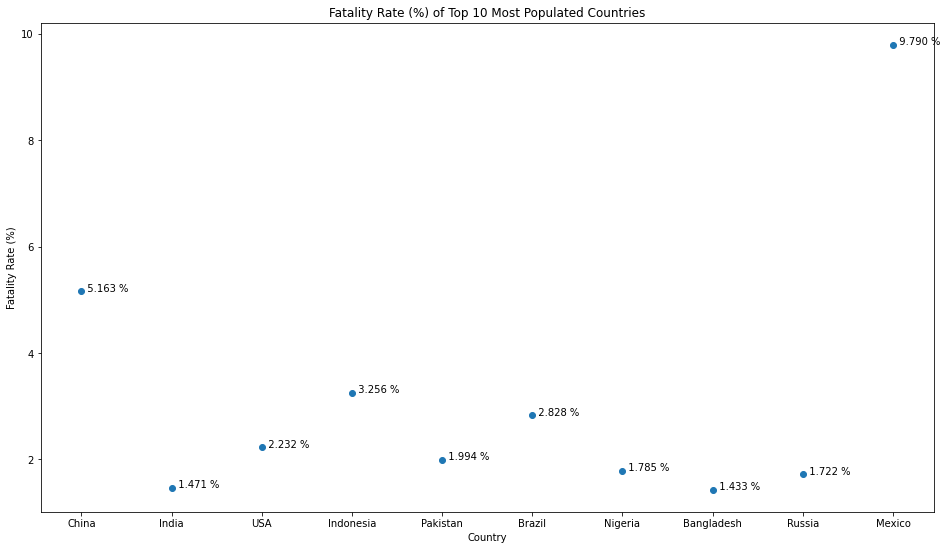

In [16]:
#Case fatality percent
countries = ['China', 'India', 'USA', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico']
fatality_rates = []

#China fatality rate
total_china_cases = china_cases.iloc[:,-1]
china_deaths = world_death_time_data.iloc[56:89,:]
china_deaths = china_deaths.groupby(china_deaths['Country/Region']).sum()
china_deaths = china_deaths.reset_index()
china_deaths = china_deaths.iloc[:,3:]
total_china_deaths = china_deaths.iloc[:,-1]
china_fatality_rate = total_china_deaths/total_china_cases *100
fatality_rates.append(china_fatality_rate)

#India fatality rate
total_india_cases = india_cases.iloc[-1]
india_deaths = world_death_time_data.iloc[143,4:]
total_india_deaths = india_deaths.iloc[-1]
india_fatality_rate = total_india_deaths/total_india_cases *100
fatality_rates.append(india_fatality_rate)

#USA fatality rate
total_us_cases = us_cases.iloc[:,-1].sum()
us_deaths = US_death_time_data.groupby(US_death_time_data['Country_Region']).sum()
us_deaths = us_deaths.reset_index()
us_deaths = us_deaths.iloc[:,7:]
total_us_deaths = us_deaths.iloc[0,-1]
us_fatality_rate = total_us_deaths/total_us_cases *100
fatality_rates.append(us_fatality_rate)

#Indonesia fatality rate
total_indonesia_cases = indonesia_cases.iloc[-1]
indonesia_deaths = world_death_time_data.iloc[144,4:]
total_indonesia_deaths = indonesia_deaths.iloc[-1]
indonesia_fatality_rate = total_indonesia_deaths/total_indonesia_cases*100
fatality_rates.append(indonesia_fatality_rate)


#Pakistan fatality rate
total_pakistan_cases = pakistan_cases.iloc[-1]
pakistan_deaths = world_death_time_data.iloc[199,4:]
total_pakistan_deaths = pakistan_deaths.iloc[-1]
pakistan_fatality_rate = total_pakistan_deaths/total_pakistan_cases*100
fatality_rates.append(pakistan_fatality_rate)

#Brazil fatality rate 
total_brazil_cases = brazil_cases.iloc[-1]
brazil_deaths = world_death_time_data.iloc[30,4:]
total_brazil_deaths = brazil_deaths.iloc[-1]
brazil_fatality_rate = total_brazil_deaths/total_brazil_cases*100
fatality_rates.append(brazil_fatality_rate)

#Nigeria fatality rate 
total_nigeria_cases = nigeria_cases.iloc[-1]
nigeria_deaths = world_death_time_data.iloc[195,4:]
total_nigeria_deaths = nigeria_deaths.iloc[-1]
nigeria_fatality_rate = total_nigeria_deaths/total_nigeria_cases*100
fatality_rates.append(nigeria_fatality_rate)

#Bangladesh fatality rate 
total_bangladesh_cases = bangladesh_cases.iloc[-1]
bangladesh_deaths = world_death_time_data.iloc[20,4:]
total_bangladesh_deaths = bangladesh_deaths.iloc[-1]
bangladesh_fatality_rate = total_bangladesh_deaths/total_bangladesh_cases*100
fatality_rates.append(bangladesh_fatality_rate)

#Russia fatality rate 
total_russia_cases = russia_cases.iloc[-1]
russia_deaths = world_death_time_data.iloc[209,4:]
total_russia_deaths = russia_deaths.iloc[-1]
russia_fatality_rate = total_russia_deaths/total_russia_cases*100
fatality_rates.append(russia_fatality_rate)

#Mexico fatality rate 
total_mexico_cases = mexico_cases.iloc[-1]
mexico_deaths = world_death_time_data.iloc[178,4:]
total_mexico_deaths = mexico_deaths.iloc[-1]
mexico_fatality_rate = total_mexico_deaths/total_mexico_cases*100
fatality_rates.append(mexico_fatality_rate)


#Graph fatality rates
plt.title("Fatality Rate (%) of Top 10 Most Populated Countries")
plt.xlabel("Country")
plt.ylabel("Fatality Rate (%)")
plt.scatter(countries, fatality_rates)

#Add labels to scatter points
for i in range(len(fatality_rates)):
  if i == 0:
    plt.annotate('  5.163 %', (countries[0], fatality_rates[0]))
  else:
    plt.annotate('  ' + str(format(fatality_rates[i], ".3f")) + " %", (countries[i], fatality_rates[i]))

plt.show()

Looking at the graph above, we are able to recognize some trends. First and foremost, Mexico has the highest mortality rate out of all of the countries at a whopping 9.79%. This wasn't very evident when we were looking at the line graphs that illustrated the number of cases per country. Mexico, compared to say the US, had a much smaller number of cases. However, it is important to remember that the number of cases isn't necessarily directly correlated with the mortality rate. In other words, a higher number of cases does not imply that the mortality rate is also high. There could be several factors that lead to Mexico's mortality percentage being so much higher than others. Perhaps their government is not providing as much aid to their citizens as other countries are, or maybe they don't have the resources they need to properly take care of their people. Just from looking at the graphs, there is no logical explanantion for why Mexico's death rate is so much higher than other countries.

Secondly, China has the next highest mortality rate out of all of the countries. It didn't come as a surprise to us that China has one of the highests mortality rates. Since the virus originated in China, the virus has obviously been present in their country the longest. This leaves more room for a higher mortality rate due to the duration of time the virus has been in China.

Lastly, the US has an intermediate mortality rate. It is on the lower end of the spectrum, (out of the top 10 most populated countries), however it is not the lowest. To reiterate, Americans have criticized the US government for their poor attempt at containing the virus. If we are using the graphs to determine the validity of this statement, the US has done a decent job compared to the other 9 countries at containing the virus. With a largely prevailing number of cases, they have managed to have a rather low mortality rate. The relationship between Mexico's mortality percentage and number of cases is something that supports this theory. Even with their low amount of cases, they have an extremely high mortality rate. On the other hand, the US has a continuously skyrocketing number of cases, but they have been able to maintain a lower mortality rate.

/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:2832: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  order=order, subok=True, ndmin=ndmin)


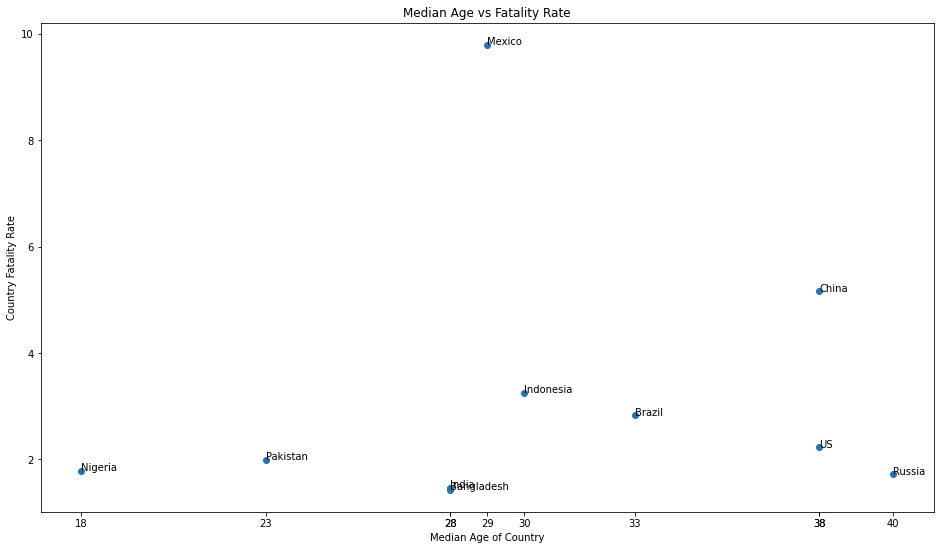

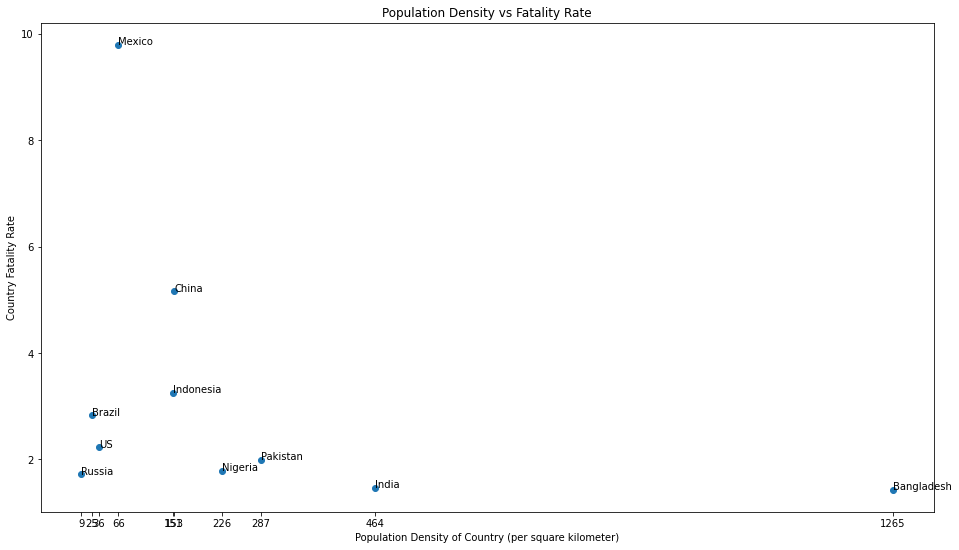

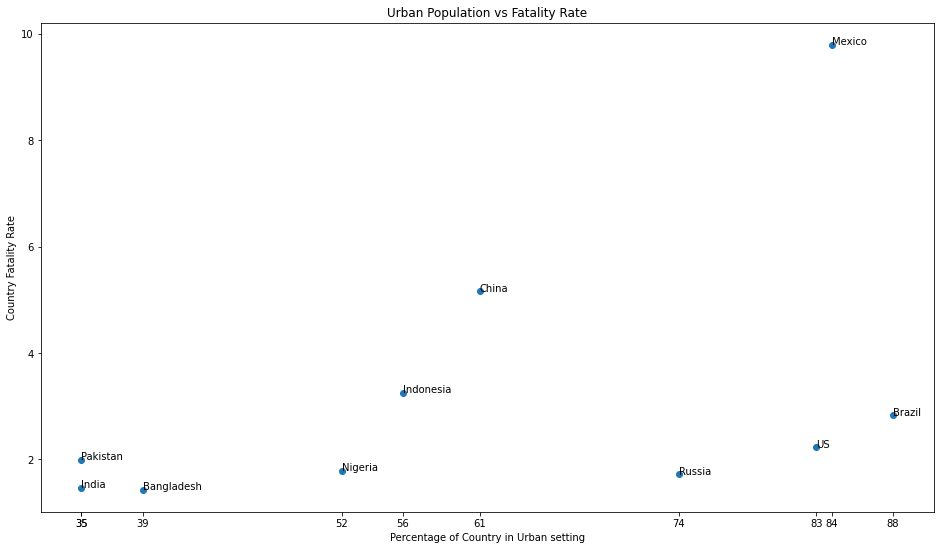

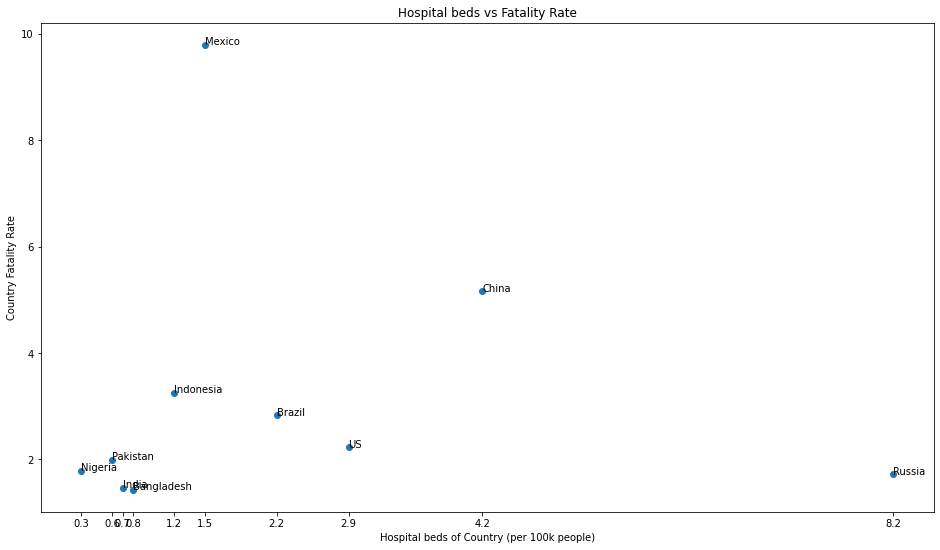

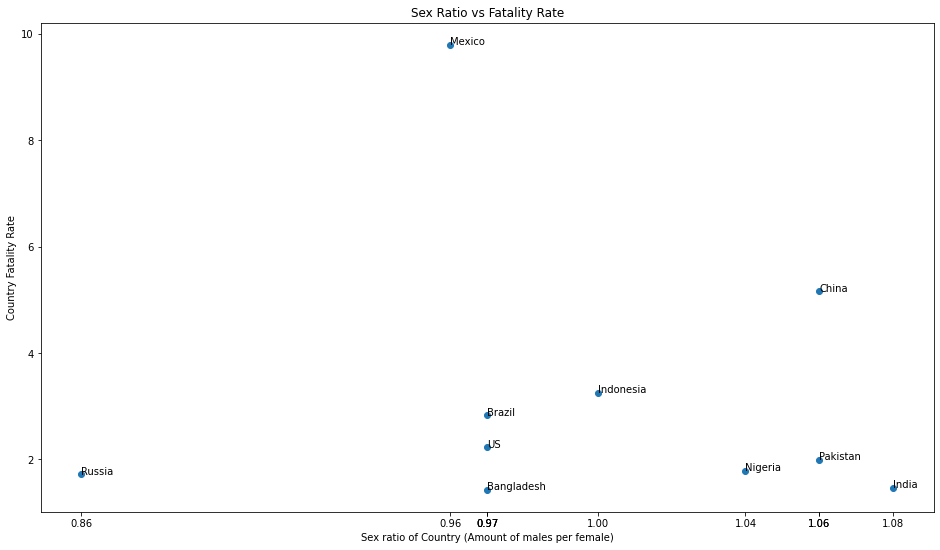

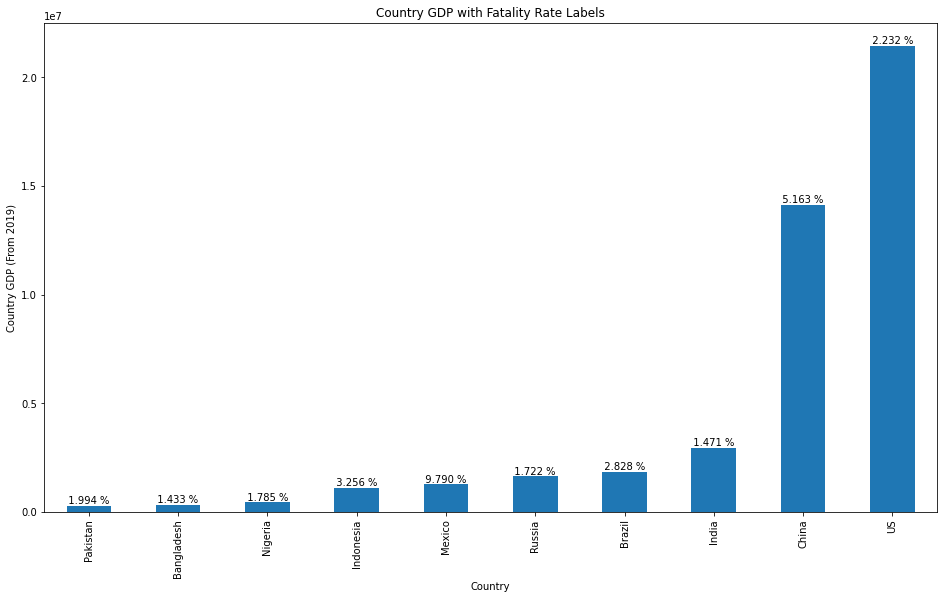

In [18]:
#Graph Median age of each country vs Fatality rate of each country
plt.scatter(country_data2['medianage'],fatality_rates)
plt.xticks(country_data2['medianage'])
plt.xlabel('Median Age of Country')
plt.ylabel('Country Fatality Rate')
plt.title('Median Age vs Fatality Rate')
for i in range(len(fatality_rates)):
  plt.annotate(country_data2['country'].iloc[i], (country_data2['medianage'].iloc[i], fatality_rates[i]))
plt.show()

#Graph Population Density of each country vs Fatality rate of each country
plt.scatter( country_data2['density'], fatality_rates)
plt.xticks(country_data2['density'])
plt.xlabel('Population Density of Country (per square kilometer)')
plt.ylabel('Country Fatality Rate')
plt.title('Population Density vs Fatality Rate')
for i in range(len(fatality_rates)):
  plt.annotate(country_data2['country'].iloc[i], (country_data2['density'].iloc[i], fatality_rates[i]))
plt.show()

#Graph percentage of country in urban setting vs Fatality rate
plt.scatter( country_data2['urbanpop'], fatality_rates)
plt.xticks(country_data2['urbanpop'])
plt.xlabel('Percentage of Country in Urban setting')
plt.ylabel('Country Fatality Rate')
plt.title('Urban Population vs Fatality Rate')
for i in range(len(fatality_rates)):
  plt.annotate(country_data2['country'].iloc[i], (country_data2['urbanpop'].iloc[i], fatality_rates[i]))
plt.show()

#Graph amount of hospital beds in each country vs Fatality rate
plt.scatter( country_data2['hospibed'], fatality_rates)
plt.xticks(country_data2['hospibed'])
plt.xlabel('Hospital beds of Country (per 100k people)')
plt.ylabel('Country Fatality Rate')
plt.title('Hospital beds vs Fatality Rate')
for i in range(len(fatality_rates)):
  plt.annotate(country_data2['country'].iloc[i], (country_data2['hospibed'].iloc[i], fatality_rates[i]))
plt.show()

#Graph sex ratio of each country vs Fatality rate of each country
plt.scatter( country_data2['sexratio'], fatality_rates)
plt.xticks(country_data2['sexratio'])
plt.xlabel('Sex ratio of Country (Amount of males per female)')
plt.ylabel('Country Fatality Rate')
plt.title('Sex Ratio vs Fatality Rate')
for i in range(len(fatality_rates)):
  plt.annotate(country_data2['country'].iloc[i], (country_data2['sexratio'].iloc[i], fatality_rates[i]))
plt.show()

#Add GDPS of each country to an array to be graphed
gdp_fatal = []
gdp_fatal.append(pakistan_fatality_rate)
gdp_fatal.append(bangladesh_fatality_rate)
gdp_fatal.append(nigeria_fatality_rate)
gdp_fatal.append(indonesia_fatality_rate)
gdp_fatal.append(mexico_fatality_rate)
gdp_fatal.append(russia_fatality_rate)
gdp_fatal.append(brazil_fatality_rate)
gdp_fatal.append(india_fatality_rate)
gdp_fatal.append(china_fatality_rate)
gdp_fatal.append(us_fatality_rate)

#Sort countries to match up with fataility array
country_data_sort = country_data2.loc[[140, 13, 136, 87, 121, 152, 22, 86, 34, 182]]
country_data_sort["gdp2019"]=country_data_sort["gdp2019"].astype(int)
#Plot GDP on a bar graph with the Fataility rate as a label on each bar for each country
ax = country_data_sort.plot(x = "country", y="gdp2019", kind="bar", legend = False)
ax.set_xlabel("Country")
ax.set_ylabel("Country GDP (From 2019)")
ax.set_title("Country GDP with Fatality Rate Labels")
for i in range(len(gdp_fatal)):
  top = country_data_sort['gdp2019'].iloc[i]
  if i == 8:
    plt.annotate('  5.163 %', (i - .3,top + 100000))
  else:
    ax.annotate('  ' + str(format(gdp_fatal[i], ".3f")) + " %", (i - .3,top + 100000))

In the graphs above, a few different variables were considered to find some explanation for why some countries had higher fatality rates than others. Median age, population density, urban population, hospital beds, sex ratio and the country's GDP were each plotted against the fatality rates for each country. These were just a few among other variables that were available in the dataset, however, we found them to be the most relevant to our project. 

Looking at the graph of median age versus fatality rate, there doesn't seem to be much correlation. Mexico, which has the highest mortality rate out of the 10 countries, has the median of median ages at 29 years old. The youngest median age belongs to Nigeria at 18 years old and the oldest median age belongs to Russia at 40 years old. Interestingly enough, both countries have nearly the same, low fatality rate at around 1.7%. In other words, the countries with the oldest and youngest median ages have the same, low mortality rate while the country with the intermediate median age has the highest mortality rate. With all of these statistics in mind, we were not able to deduce any correlation between median age and fatality rate.

When it comes to population density, there is also a lack of any clear correlation between it and fatality rate. Bangladesh has the highest population density out of all the countries, at 1,265 people per square kilometers. They have one of the lowest fatality rates at 1.433%. Contrastly, Mexico has one of the lowest population densities and it has the highest rate of death. There is not enough evidence to conclude that there is any correlation between population density and mortality rate.

Urban population is the only factor that appears to have a correlation with fatality rate! Countries that have higher percentages of the population that reside in an urban setting tend to have a higher mortality rate. This makes sense because Covid-19 is most infectious in areas where there are more people. This is due to the fact that germs spread more easily when you are within close proximity to someone who has the disease. On top of that, the more people there around you, the more likely that someone in the group has contracted the disease. Mexico, the country with the highest mortality rate, also has one of the highest urban populations. 

There is no clear correlation between the number of hospital beds available to patients and the fatality rate. Many countries that have low mortality rates also have some of the lowest amount of hospital beds. Mexico is among those that have a low amount of hospital beds, but that statistic alone is not enough to say that there is any type of relationship between the amount of hospital beds and the fatality rate. 

Along with many others, the sex ratio of men to women does not seem to have any sort of proportional relationship with fatality rate. Mexico has a ratio of 0.96 males to females in their country, and we know that they have the highest mortality rate. However, countries like Brazil, Bangladesh, and even the US have the same sex ratio and they have more than half the mortality rate of Mexico. 

Lastly, the bar graph plots the GDP of a country against the fatality rate. There is no clear correlation here. The US and China have the two highest GDPs out of all of the countries. Although many of the other countries have much lower GDPs than China and the US, they have some of the lowest fatality rates. In fact, 7 out of the 8 countries that have GDPs lower than China all have lower fatality rates than China. All of them sit under 3%, but China is sitting at 5%. Additionally, Mexico is the 8th country that has a lower GDP than China and America, but it's fatality rate is much higher than theirs. 

#MODEAL CREATION AND ANALYSIS

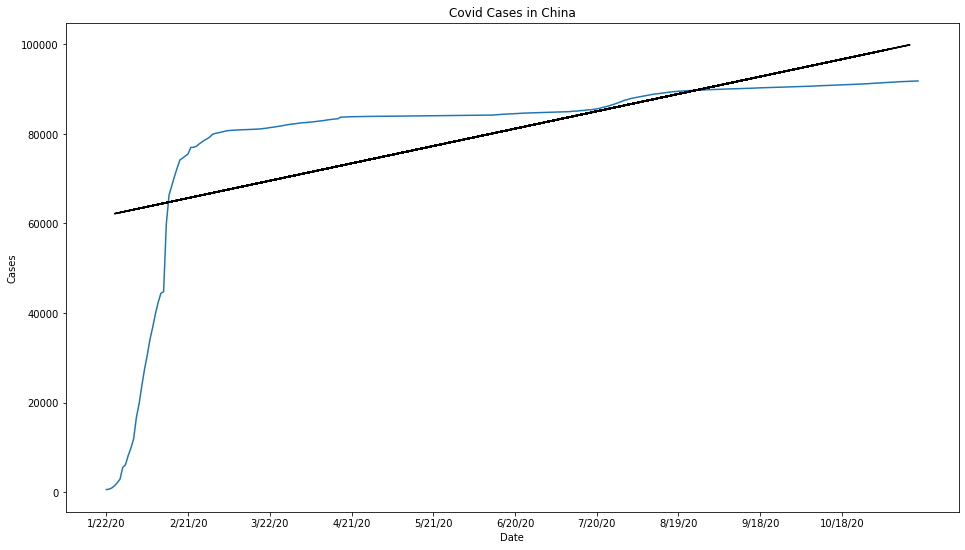

r-value: 0.393479


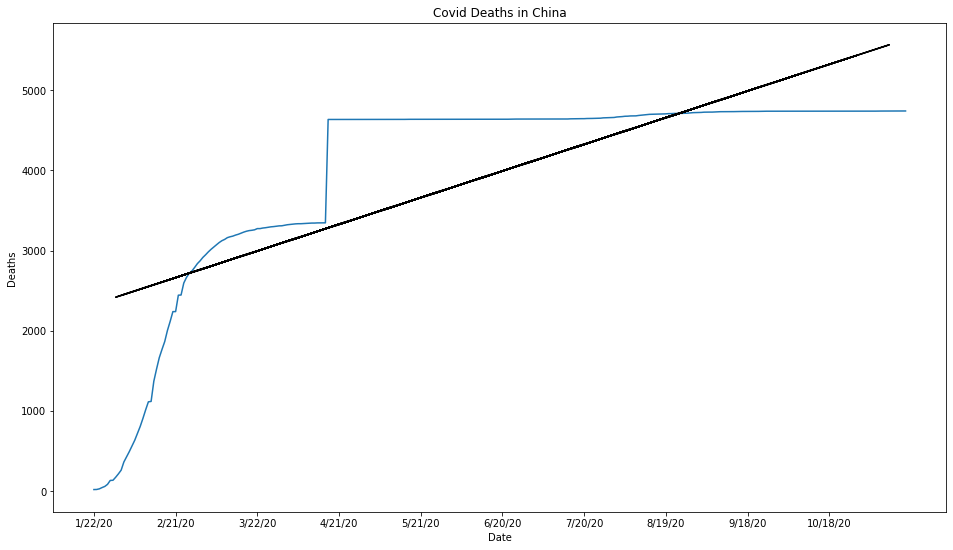

r-value: 0.577803
Equation for Predicting Cases in China: y = [[129.22109776]]x + [61807.24679124]
Equation for Predicting Deaths in China: y = [[11.09140046]]x + [2329.22474603]


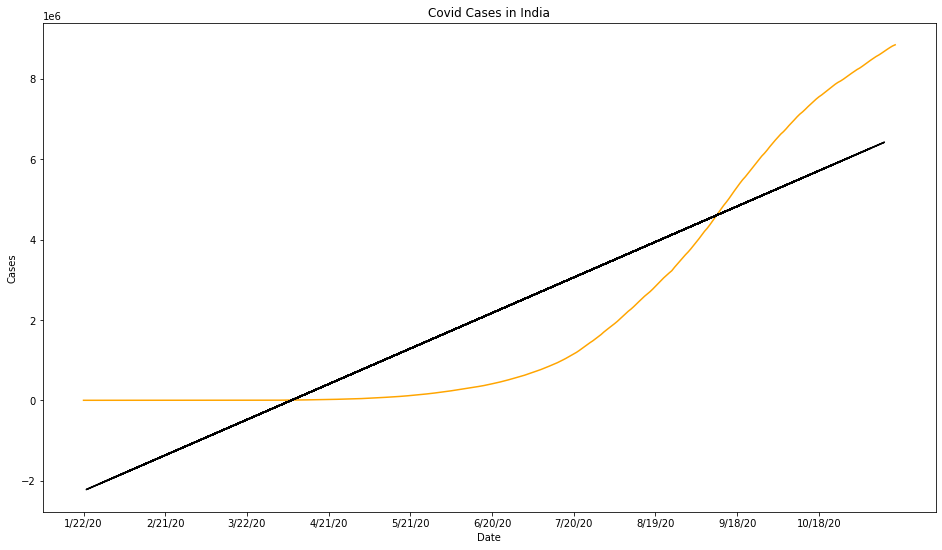

r-value: 0.762855


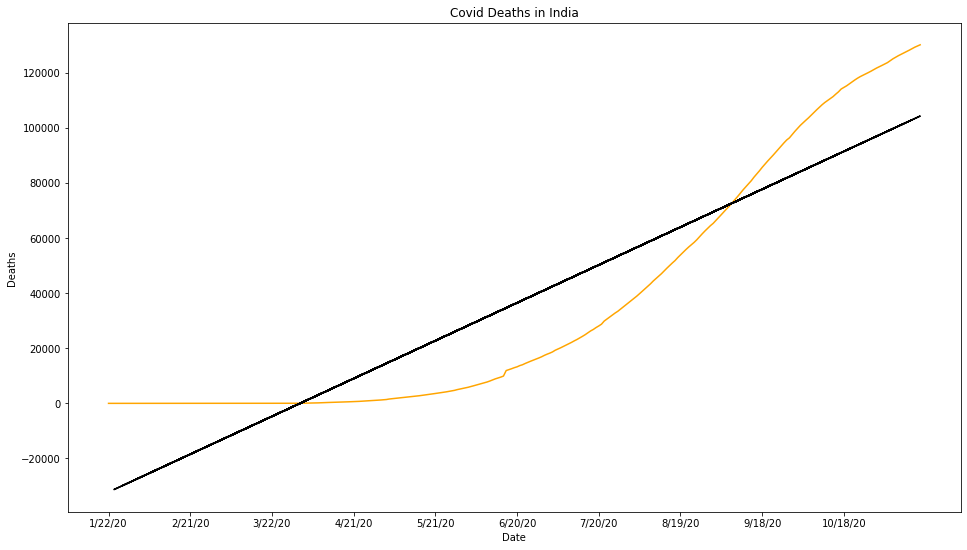

r-value: 0.825215
Equation for Predicting Cases in India: y = [[29490.10933129]]x + [-2250553.72239137]
Equation for Predicting Deaths in India: y = [[457.76211121]]x + [-32186.29152001]


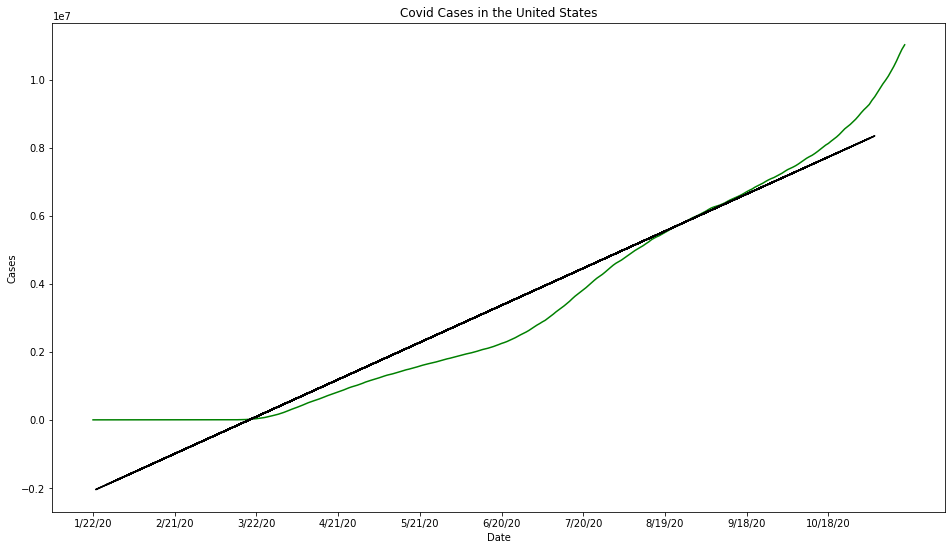

r-value: 0.933339


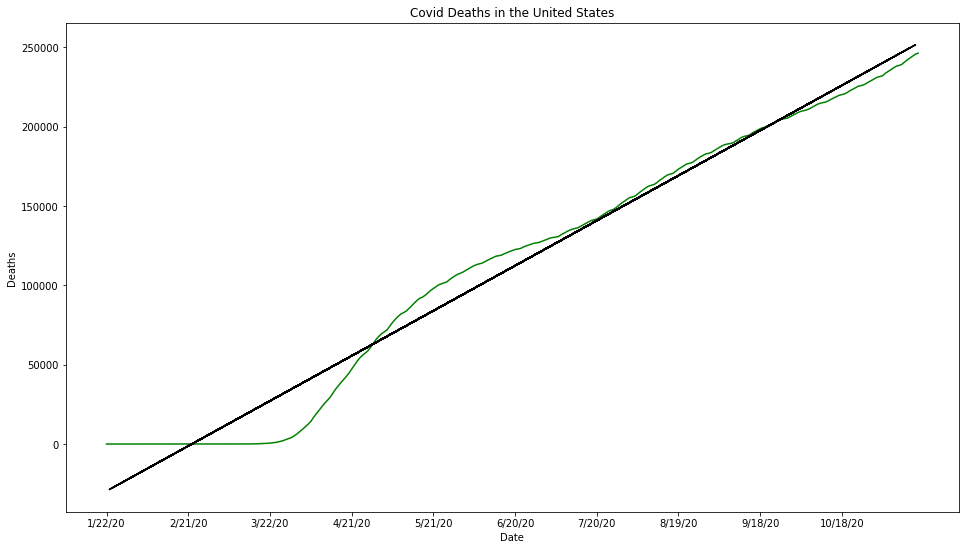

r-value: 0.977840
Equation for Predicting Cases in the USA: y = [[36363.90962435]]x + [-2086354.47575634]
Equation for Predicting Deaths in the USA: y = [[946.53403917]]x + [-29621.28668261]


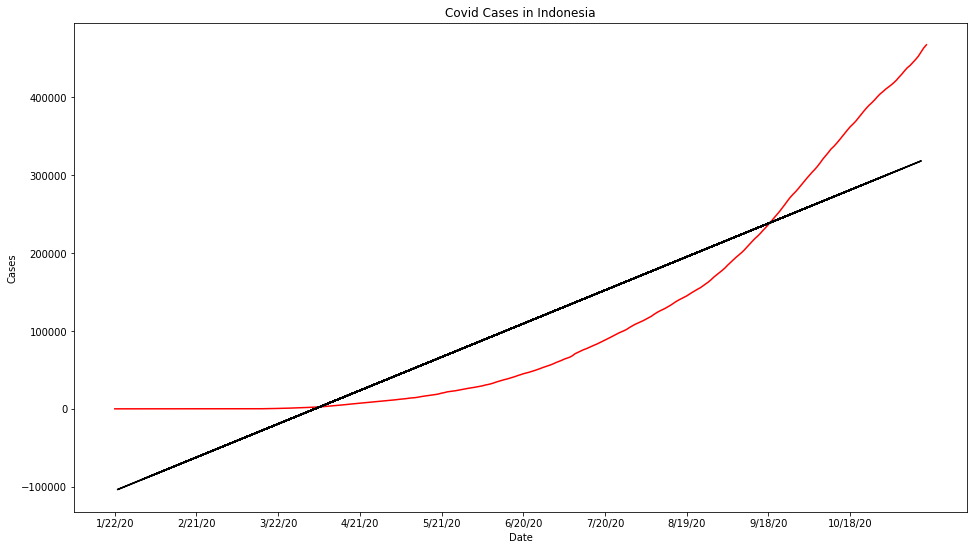

r-value: 0.801204


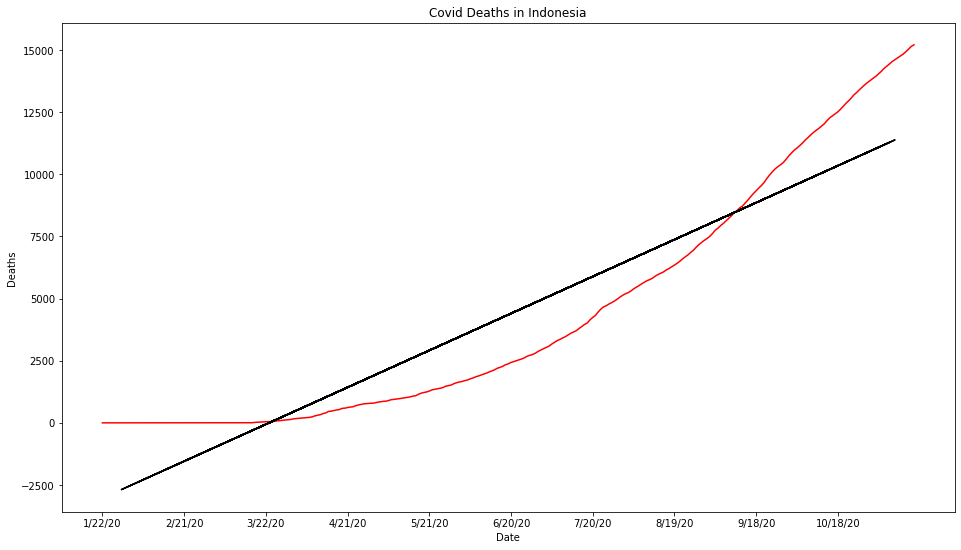

r-value: 0.874593
Equation for Predicting Cases in Indoneisa: y = [[1429.19710908]]x + [-105004.84650255]
Equation for Predicting Deaths in Indoneisa: y = [[49.54084484]]x + [-3031.1342345]


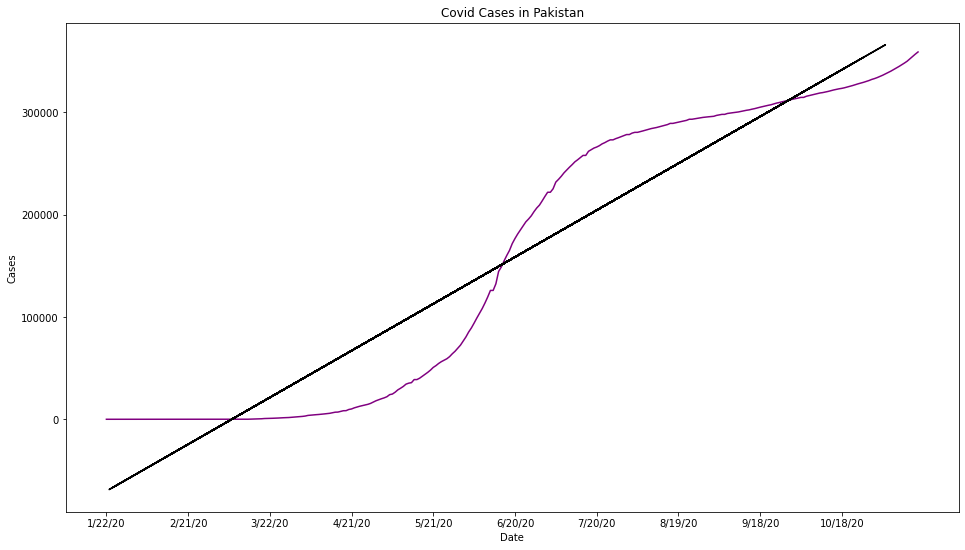

r-value: 0.912196


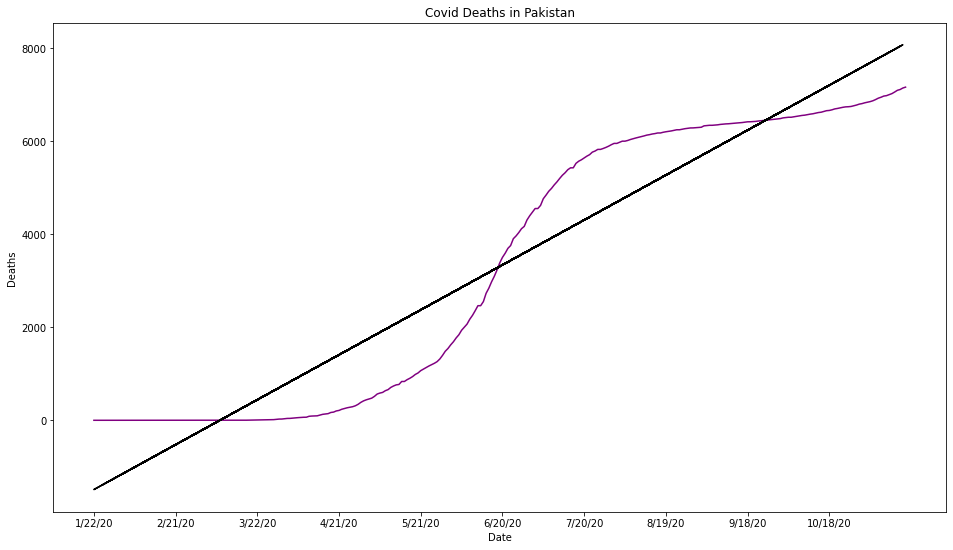

r-value: 0.904092
Equation for Predicting Cases in Pakistan: y = [[1525.3912382]]x + [-70230.68658648]
Equation for Predicting Deaths in Pakistan: y = [[32.18520867]]x + [-1488.88184082]


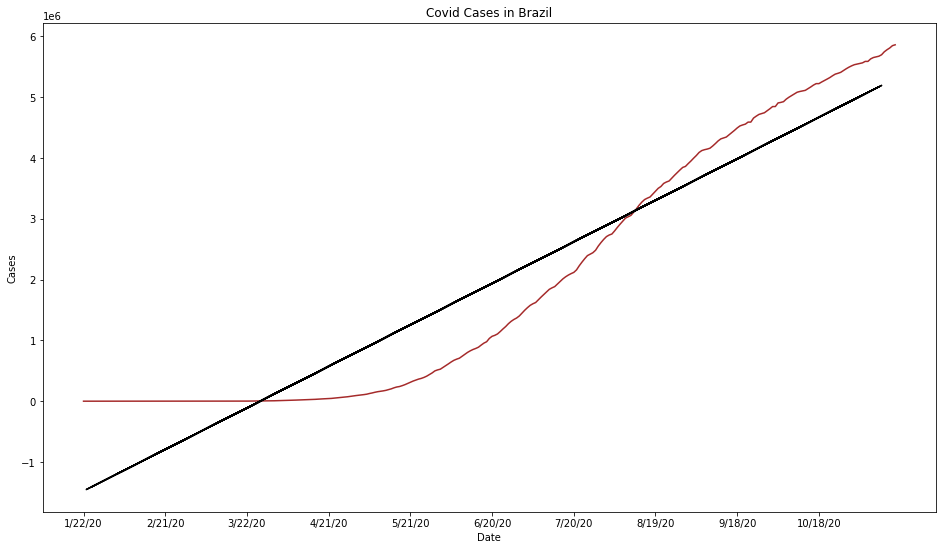

r-value: 0.895678


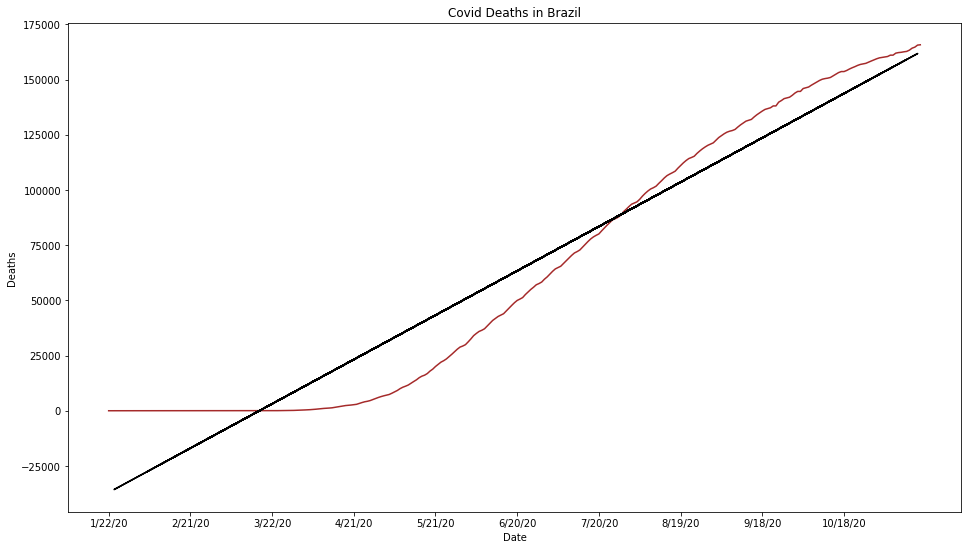

r-value: 0.935396
Equation for Predicting Cases in Brazil: y = [[22767.5309466]]x + [-1476578.34819028]
Equation for Predicting Deaths in Brazil: y = [[669.61329629]]x + [-37049.10655322]


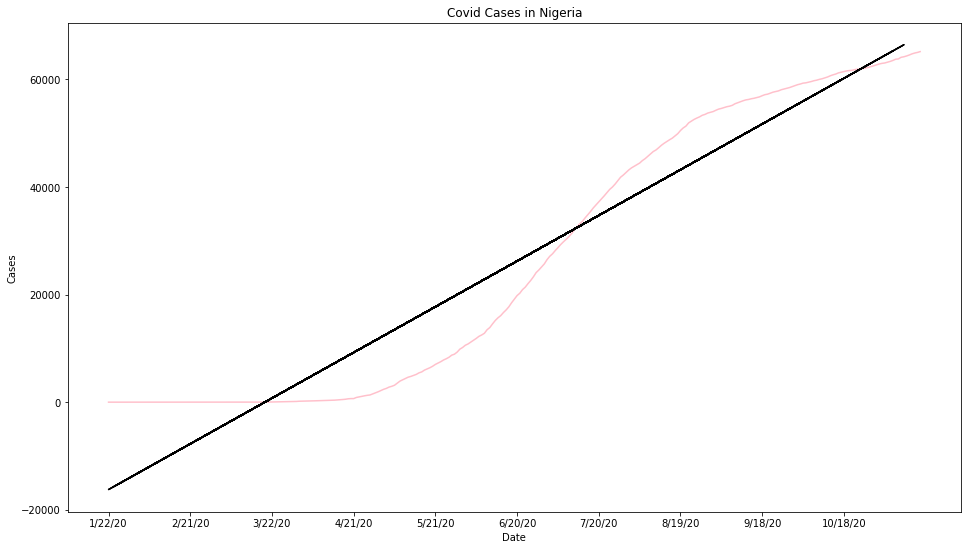

r-value: 0.921255


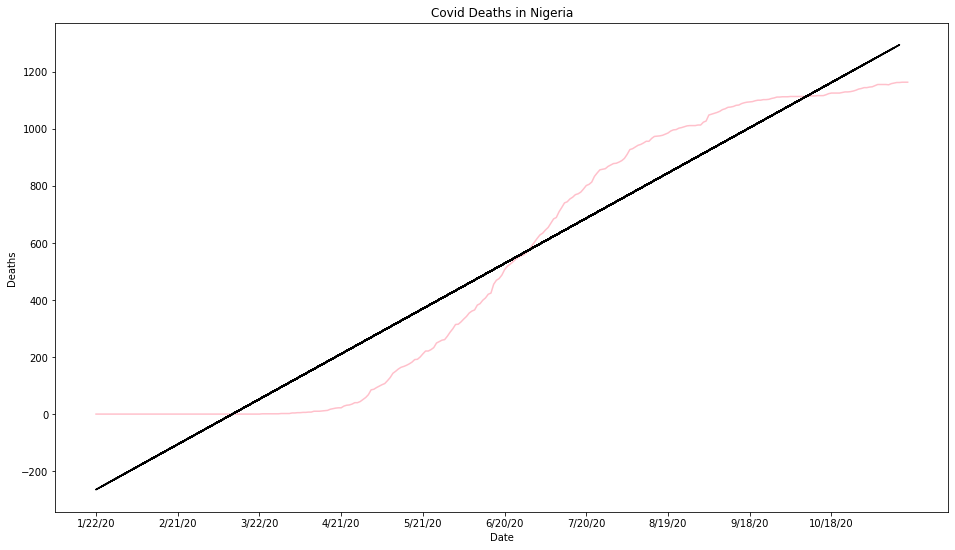

r-value: 0.929936
Equation for Predicting Cases in Nigeria: y = [[283.06740158]]x + [-16241.85884271]
Equation for Predicting Deaths in Nigeria: y = [[5.28339132]]x + [-264.47437781]


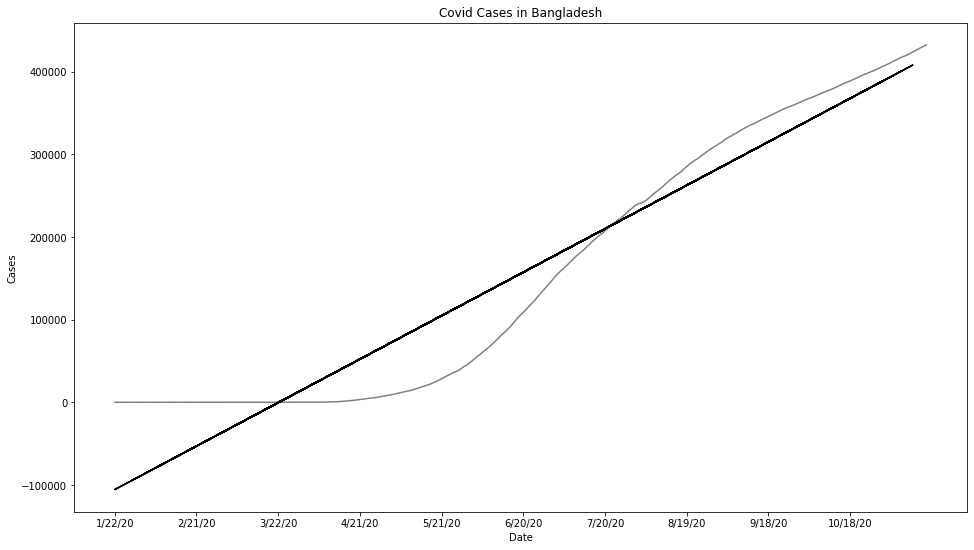

r-value: 0.917429


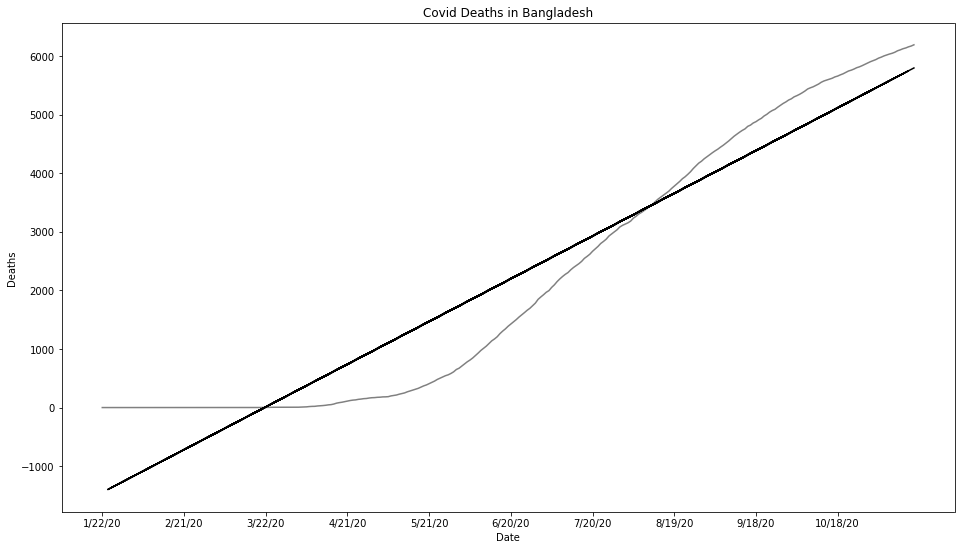

r-value: 0.912705
Equation for Predicting Cases in Bangladesh: y = [[1752.23317002]]x + [-105540.82015992]
Equation for Predicting Deaths in Bangladesh: y = [[24.31973643]]x + [-1448.82576283]


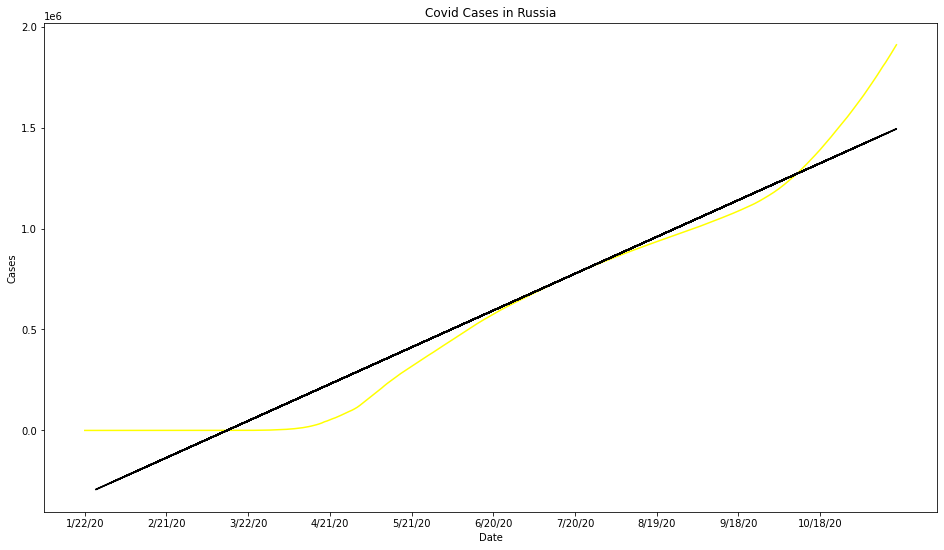

r-value: 0.943630


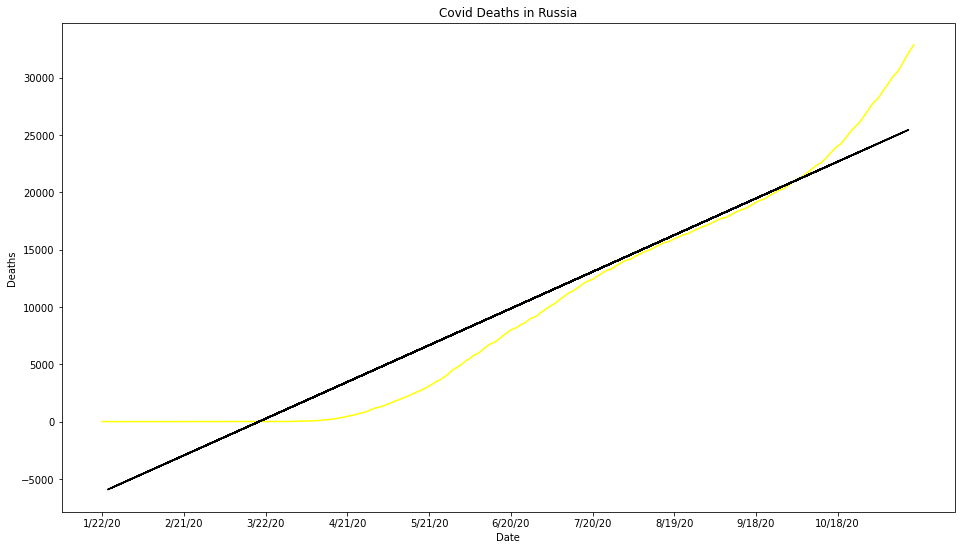

r-value: 0.925065
Equation for Predicting Cases in Russia: y = [[6076.90230874]]x + [-317208.87010836]
Equation for Predicting Deaths in Russia: y = [[106.77828907]]x + [-6145.47160124]


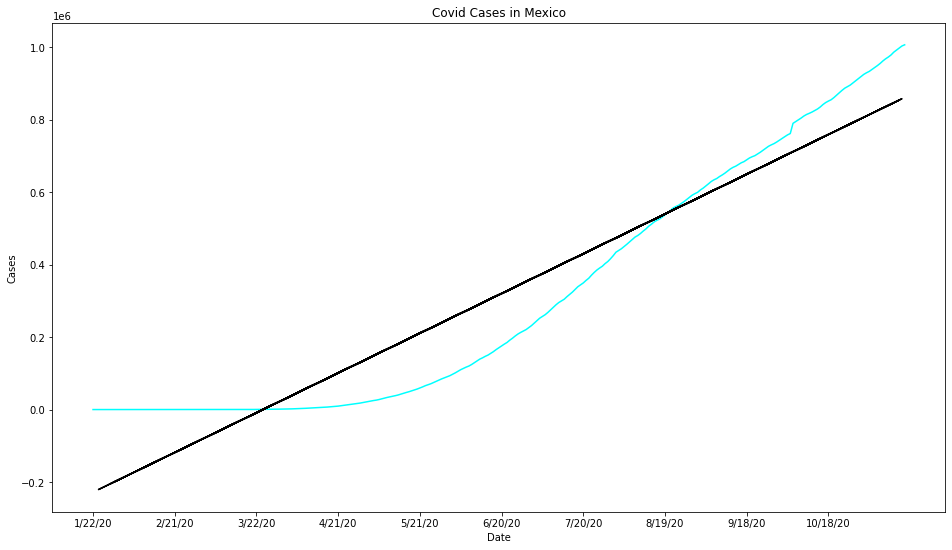

r-value: 0.897351


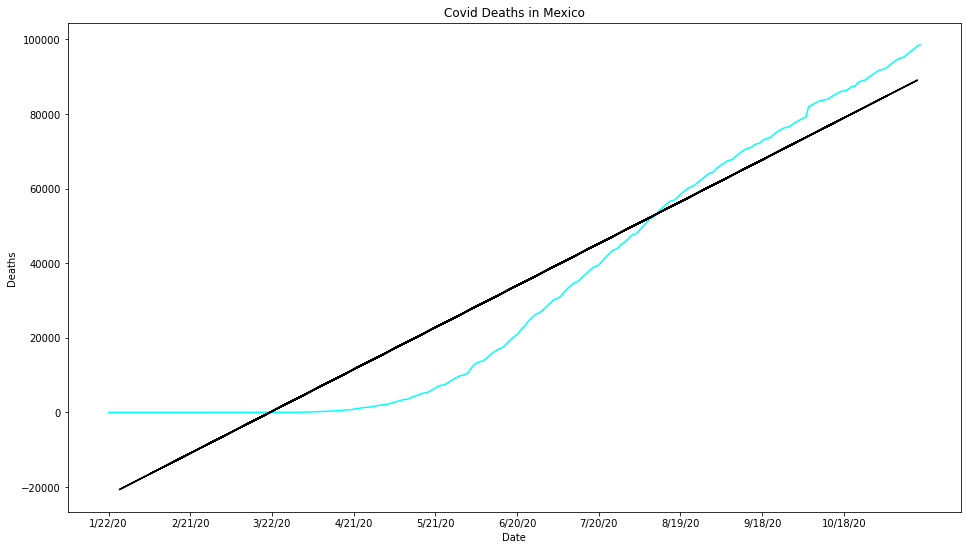

r-value: 0.911728
Equation for Predicting Cases in Mexico: y = [[3655.78793611]]x + [-228078.01318375]
Equation for Predicting Deaths in Mexico: y = [[374.63375472]]x + [-22198.12109404]


In [20]:
#MODEL CREATION AND ANALYSIS

#China Case Models
X = np.array(range(0,len(dates)))
y = np.array(china_cases)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
china_cases_model = LinearRegression()
china_cases_model.fit(X_train, y_train)
y_pred = china_cases_model.predict(X_test)
r_value = china_cases_model.score(X,y)

plt.plot(dates, china_cases.iloc[0], label='China')
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Cases in China') 
plt.xlabel('Date')
plt.ylabel('Cases')
plt.plot(X_test, y_pred, color = "black")
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))

#China death model
X = np.array(range(0,len(dates)))
y = np.array(china_deaths)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
china_death_model = LinearRegression()
china_death_model.fit(X_train, y_train)
y_pred = china_death_model.predict(X_test)
r_value = china_death_model.score(X,y)

plt.plot(dates, china_deaths.iloc[0], label='China')
plt.plot(X_test, y_pred, color = "black")
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Deaths in China')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))
print('Equation for Predicting Cases in China: y = ' + str(china_cases_model.coef_) + 'x + ' + str(china_cases_model.intercept_))
print('Equation for Predicting Deaths in China: y = ' + str(china_death_model.coef_) + 'x + ' + str(china_death_model.intercept_))

#India case model
X = np.array(range(0,len(dates)))
y = np.array(india_cases)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
india_cases_model = LinearRegression()
india_cases_model.fit(X_train, y_train)
y_pred = india_cases_model.predict(X_test)
r_value = india_cases_model.score(X,y)

plt.plot(dates, india_cases, label='India', color = 'orange')
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Cases in India') 
plt.xlabel('Date')
plt.ylabel('Cases')
plt.plot(X_test, y_pred, color = 'black')
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))

#India death model
X = np.array(range(0,len(dates)))
y = np.array(india_deaths)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
india_death_model = LinearRegression()
india_death_model.fit(X_train, y_train)
y_pred = india_death_model.predict(X_test)
r_value = india_death_model.score(X,y)

plt.plot(dates, india_deaths, label='India', color = 'orange')
plt.plot(X_test, y_pred, color = 'black')
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Deaths in India')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))
print('Equation for Predicting Cases in India: y = ' + str(india_cases_model.coef_) + 'x + ' + str(india_cases_model.intercept_))
print('Equation for Predicting Deaths in India: y = ' + str(india_death_model.coef_) + 'x + ' + str(india_death_model.intercept_))

#United States case model
us_cases = US_cases_time_data.groupby(US_cases_time_data['Country_Region']).sum()
us_cases = us_cases.reset_index()
us_cases = us_cases.iloc[:,6:]
X = np.array(range(0,len(dates)))
y = np.array(us_cases)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
us_cases_model = LinearRegression()
us_cases_model.fit(X_train, y_train)
y_pred = us_cases_model.predict(X_test)
r_value = us_cases_model.score(X,y)

plt.plot(dates, us_cases.iloc[0], label='United States', color = 'green')
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Cases in the United States') 
plt.xlabel('Date')
plt.ylabel('Cases')
plt.plot(X_test, y_pred, color = "black")
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))

#US death model
X = np.array(range(0,len(dates)))
y = np.array(us_deaths.iloc[0])
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
us_death_model = LinearRegression()
us_death_model.fit(X_train, y_train)
y_pred = us_death_model.predict(X_test)
r_value = us_death_model.score(X,y)

plt.plot(dates, us_deaths.iloc[0], label='United States', color = 'green')
plt.plot(X_test, y_pred, color = "black")
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Deaths in the United States')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))
print('Equation for Predicting Cases in the USA: y = ' + str(us_cases_model.coef_) + 'x + ' + str(us_cases_model.intercept_))
print('Equation for Predicting Deaths in the USA: y = ' + str(us_death_model.coef_) + 'x + ' + str(us_death_model.intercept_))

#Indonesia case model
X = np.array(range(0,len(dates)))
y = np.array(indonesia_cases)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
indonesia_cases_model = LinearRegression()
indonesia_cases_model.fit(X_train, y_train)
y_pred = indonesia_cases_model.predict(X_test)
r_value = indonesia_cases_model.score(X,y) 

plt.plot(dates, indonesia_cases, color = 'red')
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Cases in Indonesia') 
plt.xlabel('Date')
plt.ylabel('Cases')
plt.plot(X_test, y_pred, color = "black")
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))

#Indonesia death model
X = np.array(range(0,len(dates)))
y = np.array(indonesia_deaths)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
indonesia_death_model = LinearRegression()
indonesia_death_model.fit(X_train, y_train)
y_pred = indonesia_death_model.predict(X_test)
r_value = indonesia_death_model.score(X,y)

plt.plot(dates, indonesia_deaths, color = 'red')
plt.plot(X_test, y_pred, color = "black")
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Deaths in Indonesia')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))
print('Equation for Predicting Cases in Indoneisa: y = ' + str(indonesia_cases_model.coef_) + 'x + ' + str(indonesia_cases_model.intercept_))
print('Equation for Predicting Deaths in Indoneisa: y = ' + str(indonesia_death_model.coef_) + 'x + ' + str(indonesia_death_model.intercept_))

#Pakistan case model
X = np.array(range(0,len(dates)))
y = np.array(pakistan_cases)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
pakistan_cases_model = LinearRegression()
pakistan_cases_model.fit(X_train, y_train)
y_pred = pakistan_cases_model.predict(X_test)
r_value = pakistan_cases_model.score(X,y) 

plt.plot(dates, pakistan_cases, color = 'purple')
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Cases in Pakistan') 
plt.xlabel('Date')
plt.ylabel('Cases')
plt.plot(X_test, y_pred, color = "black")
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))

#Pakistan death model
X = np.array(range(0,len(dates)))
y = np.array(pakistan_deaths)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
pakistan_death_model = LinearRegression()
pakistan_death_model.fit(X_train, y_train)
y_pred = pakistan_death_model.predict(X_test)
r_value = pakistan_death_model.score(X,y)

plt.plot(dates, pakistan_deaths, color = 'purple')
plt.plot(X_test, y_pred, color = "black")
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Deaths in Pakistan')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))
print('Equation for Predicting Cases in Pakistan: y = ' + str(pakistan_cases_model.coef_) + 'x + ' + str(pakistan_cases_model.intercept_))
print('Equation for Predicting Deaths in Pakistan: y = ' + str(pakistan_death_model.coef_) + 'x + ' + str(pakistan_death_model.intercept_))

#Brazil case model
X = np.array(range(0,len(dates)))
y = np.array(brazil_cases)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
brazil_cases_model = LinearRegression()
brazil_cases_model.fit(X_train, y_train)
y_pred = brazil_cases_model.predict(X_test) 
r_value = brazil_cases_model.score(X,y)

plt.plot(dates, brazil_cases, color = 'brown')
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Cases in Brazil') 
plt.xlabel('Date')
plt.ylabel('Cases')
plt.plot(X_test, y_pred, color = "black")
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))

#Brazil death model
X = np.array(range(0,len(dates)))
y = np.array(brazil_deaths)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
brazil_death_model = LinearRegression()
brazil_death_model.fit(X_train, y_train)
y_pred = brazil_death_model.predict(X_test)
r_value = brazil_death_model.score(X,y)

plt.plot(dates, brazil_deaths, color = 'brown')
plt.plot(X_test, y_pred, color = "black")
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Deaths in Brazil')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))
print('Equation for Predicting Cases in Brazil: y = ' + str(brazil_cases_model.coef_) + 'x + ' + str(brazil_cases_model.intercept_))
print('Equation for Predicting Deaths in Brazil: y = ' + str(brazil_death_model.coef_) + 'x + ' + str(brazil_death_model.intercept_))

#Nigeria case model
X = np.array(range(0,len(dates)))
y = np.array(nigeria_cases)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
nigeria_cases_model = LinearRegression()
nigeria_cases_model.fit(X_train, y_train)
y_pred = nigeria_cases_model.predict(X_test)
r_value = nigeria_cases_model.score(X,y) 

plt.plot(dates, nigeria_cases, color = 'pink')
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Cases in Nigeria') 
plt.xlabel('Date')
plt.ylabel('Cases')
plt.plot(X_test, y_pred, color = "black")
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))

#Nigeria death model
X = np.array(range(0,len(dates)))
y = np.array(nigeria_deaths)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
nigeria_death_model = LinearRegression()
nigeria_death_model.fit(X_train, y_train)
y_pred = nigeria_death_model.predict(X_test)
r_value = nigeria_death_model.score(X,y)

plt.plot(dates, nigeria_deaths, color = 'pink')
plt.plot(X_test, y_pred, color = "black")
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Deaths in Nigeria')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))
print('Equation for Predicting Cases in Nigeria: y = ' + str(nigeria_cases_model.coef_) + 'x + ' + str(nigeria_cases_model.intercept_))
print('Equation for Predicting Deaths in Nigeria: y = ' + str(nigeria_death_model.coef_) + 'x + ' + str(nigeria_death_model.intercept_))

#Bangladesh case model
X = np.array(range(0,len(dates)))
y = np.array(bangladesh_cases)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
bangladesh_cases_model = LinearRegression()
bangladesh_cases_model.fit(X_train, y_train)
y_pred = bangladesh_cases_model.predict(X_test) 
r_value = bangladesh_cases_model.score(X,y)

plt.plot(dates, bangladesh_cases, color = 'gray')
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Cases in Bangladesh') 
plt.xlabel('Date')
plt.ylabel('Cases')
plt.plot(X_test, y_pred, color = "black")
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))

#Bangladesh death model
X = np.array(range(0,len(dates)))
y = np.array(bangladesh_deaths)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
bangladesh_death_model = LinearRegression()
bangladesh_death_model.fit(X_train, y_train)
y_pred = bangladesh_death_model.predict(X_test)
r_value = bangladesh_death_model.score(X,y)

plt.plot(dates, bangladesh_deaths, color = 'gray')
plt.plot(X_test, y_pred, color = "black")
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Deaths in Bangladesh')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))
print('Equation for Predicting Cases in Bangladesh: y = ' + str(bangladesh_cases_model.coef_) + 'x + ' + str(bangladesh_cases_model.intercept_))
print('Equation for Predicting Deaths in Bangladesh: y = ' + str(bangladesh_death_model.coef_) + 'x + ' + str(bangladesh_death_model.intercept_))

#Russia case model
X = np.array(range(0,len(dates)))
y = np.array(russia_cases)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
russia_cases_model = LinearRegression()
russia_cases_model.fit(X_train, y_train)
y_pred = russia_cases_model.predict(X_test)
r_value = russia_cases_model.score(X,y) 

plt.plot(dates, russia_cases, color = 'yellow')
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Cases in Russia') 
plt.xlabel('Date')
plt.ylabel('Cases')
plt.plot(X_test, y_pred, color = "black")
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))

#Russia death model
X = np.array(range(0,len(dates)))
y = np.array(russia_deaths)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
russia_death_model = LinearRegression()
russia_death_model.fit(X_train, y_train)
y_pred = russia_death_model.predict(X_test)
r_value = russia_death_model.score(X,y)

plt.plot(dates, russia_deaths, color = 'yellow')
plt.plot(X_test, y_pred, color = "black")
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Deaths in Russia')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))
print('Equation for Predicting Cases in Russia: y = ' + str(russia_cases_model.coef_) + 'x + ' + str(russia_cases_model.intercept_))
print('Equation for Predicting Deaths in Russia: y = ' + str(russia_death_model.coef_) + 'x + ' + str(russia_death_model.intercept_))

#Mexico case model
X = np.array(range(0,len(dates)))
y = np.array(mexico_cases)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
mexico_cases_model = LinearRegression()
mexico_cases_model.fit(X_train, y_train)
y_pred = mexico_cases_model.predict(X_test) 
r_value = mexico_cases_model.score(X,y)

plt.plot(dates, mexico_cases, color = 'cyan')
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Cases in Mexico') 
plt.xlabel('Date')
plt.ylabel('Cases')
plt.plot(X_test, y_pred, color = "black")
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))

#Mexico death model
X = np.array(range(0,len(dates)))
y = np.array(mexico_deaths)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
mexico_death_model = LinearRegression()
mexico_death_model.fit(X_train, y_train)
y_pred = mexico_death_model.predict(X_test)
r_value = mexico_death_model.score(X,y)

plt.plot(dates, mexico_deaths, color = 'cyan')
plt.plot(X_test, y_pred, color = "black")
plt.xticks(np.arange(0, len(dates), step=30))
plt.title('Covid Deaths in Mexico')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()
print('r-value: ' + str(format(r_value, ".6f")))
print('Equation for Predicting Cases in Mexico: y = ' + str(mexico_cases_model.coef_) + 'x + ' + str(mexico_cases_model.intercept_))
print('Equation for Predicting Deaths in Mexico: y = ' + str(mexico_death_model.coef_) + 'x + ' + str(mexico_death_model.intercept_))

In this section we began using a machine learning technique called linear regression to predict what the fatality rates of the top 10 most populated countries may be in the future. We used the scikit-learn library to achieve this. For each model created we print the r-value and the equation of the regression line. The closer the r-value is to 1, the stronger the linear relationship of the data is. Most of the models have a high r-value which means they have a strong linear relationship. Models with higher r-value are better at predicting future data. The models with the lowest r-values are the models that predicted China's number of cases and deaths. This lack of a linear relationship can be attributed to the large jump in reported deaths in April of 2020. This jump is further explained in this New York Times article: https://www.nytimes.com/2020/04/17/world/asia/china-wuhan-coronavirus-death-toll.html

Using these models we can predict what the fatality rates might be in these countries at some point in the future. We created a function that can determine the future fatality rates based on the models. 

x is the number of days after January 22nd, 2020


In [10]:
def future_fatality(x):
  fatal = (china_death_model.coef_ * x + china_death_model.intercept_) / (china_cases_model.coef_ * x + china_cases_model.intercept_)
  print('China: ' + (str(fatal * 100))[2:-7] + '%') 

  fatal = (india_death_model.coef_ * x + india_death_model.intercept_) / (india_cases_model.coef_ * x + india_cases_model.intercept_)
  print('India: ' + (str(fatal * 100))[2:-7] + '%')

  fatal = (us_death_model.coef_ * x + us_death_model.intercept_) / (us_cases_model.coef_ * x + us_cases_model.intercept_)
  print('USA: ' + (str(fatal * 100))[2:-7] + '%')

  fatal = (indonesia_death_model.coef_ * x + indonesia_death_model.intercept_) / (indonesia_cases_model.coef_ * x + indonesia_cases_model.intercept_)
  print('Indonesia: ' + (str(fatal * 100))[2:-7] + '%')

  fatal = (pakistan_death_model.coef_ * x + pakistan_death_model.intercept_) / (pakistan_cases_model.coef_ * x + pakistan_cases_model.intercept_)
  print('Pakistan: ' + (str(fatal * 100))[2:-7] + '%')

  fatal = (brazil_death_model.coef_ * x + brazil_death_model.intercept_) / (brazil_cases_model.coef_ * x + brazil_cases_model.intercept_)
  print('Brazil: ' + (str(fatal * 100))[2:-7] + '%')

  fatal = (nigeria_death_model.coef_ * x + nigeria_death_model.intercept_) / (nigeria_cases_model.coef_ * x + nigeria_cases_model.intercept_)
  print('Nigeria: ' + (str(fatal * 100))[2:-7] + '%')

  fatal = (bangladesh_death_model.coef_ * x + bangladesh_death_model.intercept_) / (bangladesh_cases_model.coef_ * x + bangladesh_cases_model.intercept_)
  print('Bangladesh: ' + (str(fatal * 100))[2:-7] + '%')

  fatal = (russia_death_model.coef_ * x + russia_death_model.intercept_) / (russia_cases_model.coef_ * x + russia_cases_model.intercept_)
  print('Russia: ' + (str(fatal * 100))[2:-7] + '%')

  fatal = (mexico_death_model.coef_ * x + mexico_death_model.intercept_) / (mexico_cases_model.coef_ * x + mexico_cases_model.intercept_)
  print('Mexico: ' + (str(fatal * 100))[2:-7] + '%')

print('Fatality Rate Prediction for 1/22/21: ')
future_fatality(367)
print('')
print('Fatality Rate Prediction for 2/22/21: ')
future_fatality(398)
print('')
print('Fatality Rate Prediction for 3/22/21: ')
future_fatality(425)

Fatality Rate Prediction for 1/22/21: 
China: 5.665%
India: 1.640%
USA: 2.859%
Indonesia: 3.814%
Pakistan: 2.080%
Brazil: 3.023%
Nigeria: 1.905%
Bangladesh: 1.409%
Russia: 1.700%
Mexico: 10.439%

Fatality Rate Prediction for 2/22/21: 
China: 5.728%
India: 1.638%
USA: 2.842%
Indonesia: 3.804%
Pakistan: 2.080%
Brazil: 3.01%
Nigeria: 1.902%
Bangladesh: 1.409%
Russia: 1.702%
Mexico: 10.431%

Fatality Rate Prediction for 3/22/21: 
China: 5.77%
India: 1.637%
USA: 2.830%
Indonesia: 3.796%
Pakistan: 2.080%
Brazil: 3.011%
Nigeria: 1.900%
Bangladesh: 1.410%
Russia: 1.703%
Mexico: 10.426%


These are the predicted fatality rates we calculated by using the models we created in the previous section. We used the models to predict the fatality rates of the top 10 most populated countries for the next three months.


#CONCLUSION AND INTERPRETATION
The general consensus that we came to is that the criticism of the US government  doing a poor job in containing the virus is somewhat unwarranted. It is natural to feel frustrated in these uncertain times, and there is always a desire to place blame on someone. Many Americans have placed the blame on the US government as Covid restrictions stay enforced and our lives remain changed. It is true that the United States has been skyrocketing in the number of cases each day for the better part of a year. However, to be fair, they have been able to maintain a rather low fatality rate - one that is consistent with countries that have a much lower amount of cases. 

Based on the variables that we evaluted, we were not able to determine any outstanding factors that led the US to have such a large number of cases compared to other countires. Likewise, we were not able to determine how the US has been able to maintain a low mortality rate with the large load of Covid cases that we have. We were able to come to the conclusion that the US has shown that they have been working hard to treat people that do contract the disease - they just need to work on preventing it from spreading instead of treating it.

A question that we came across while we were analyzing the data is why is Mexico's fatality rate so much higher than other countries? Looking at the variables, Mexico has a rather intermediate median age, at 29 years old. We made the assumption that this relatively young median age yields more travelers, which means a higher likelihood of transmission and exposure. They have an average population density but they have one of the highest urban populations. Additionally, they have a low number of hospital beds compared to other counties - one of the lowest. For all of these reason, we came up with a hypothesis that the combination of all of these factors contributed to their incredibly high mortality rate.

The last thing that we were able to deduce is that urban population was the only factor that we found to have a distinct correlation to fatality rate. Obviously, urban areas are more dense, which means that more people are in close proximity to each other. The more people that you are around, the most likely you are to get exposed to the virus and/or contract it. This is why the fact that urban population is proportional to fatality rate makes sense.

One of the takeaways that we hope people have from this project is that these are extremely uncertain times. We don't know much about this virus, and it has had a detrimental effect on many countries. Remember to take precautions and live safely!